In [9]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.mode.chained_assignment = None

import warnings

from stats import win_rate, count, played, goals_scored_total, goals_scored_avg, goals_lost_total, goals_lost_avg

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [45]:
from stats import win_rate, count, played, goals_scored_total, goals_scored_avg, goals_lost_total, goals_lost_avg

In [46]:
goals_scored_total

<function stats.goals_scored_total(df, name, position=None)>

In [19]:
# df = pd.read_csv('data/seuk_scores.csv', sep = ';', parse_dates=['Date'])
# df = df.drop('Date', axis = 1)
df_1 = pd.read_excel('data/seuk_04.xlsx')
# df = df_1.drop('Date', axis = 1)

In [15]:
df_1.dtypes

Date         datetime64[ns]
Attack_1             object
Defence_1            object
Attack_2             object
Defence_2            object
G1                    int64
G2                    int64
Win                   int64
dtype: object

In [28]:
grouped = df_1.groupby(['Date']).count()['Win']

In [34]:
grouped.index

DatetimeIndex(['2023-03-28', '2023-03-30', '2023-04-04', '2023-04-05',
               '2023-04-06'],
              dtype='datetime64[ns]', name='Date', freq=None)

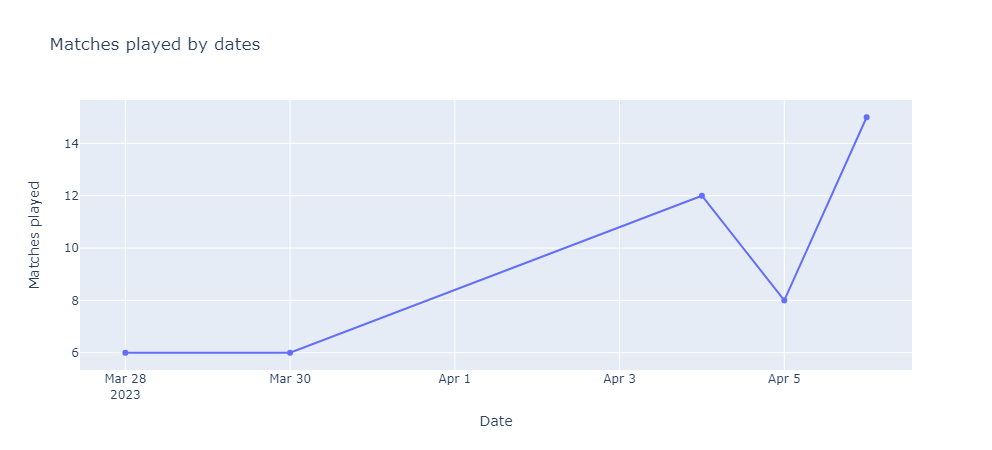

In [52]:
px.line(x = grouped.index, 
        y = grouped.values,
        title='Matches played by dates', 
        labels={ "x": "Date",
                 "y": "Matches played"}, 
        markers = True, 
        height=450,
        width=800 )

In [308]:
def count(lst):
    return sum(bool(x) for x in lst)

In [309]:
def played(df, name, position = 'all'):
    
    '''Calculating all matches played by played'''
    
    if position == 'all':       
        played = len(df.loc[(df['Attack_1'] == name) | (df['Attack_2'] == name) | (df['Defence_1'] == name) | (df['Defence_2'] == name)])
        
    elif position == 'attack':
        played = len(df.loc[(df['Attack_1'] == name) | (df['Attack_2'] == name)])
    
    elif position == 'defence':
        played = len(df.loc[(df['Defence_1'] == name) | (df['Defence_2'] == name)])
        
    
    return played

In [41]:
def win_rate(df, name, position = 'all'):
    
    ''' Calculating players win rate '''
    
    if position == 'all':
        
        wins_1 = len(df.loc[((df['Attack_1'] == name) | (df['Defence_1'] == name)) & df['Win'] == 1])
        wins_2 = len(df.loc[(df['Win'] == 2) & ((df['Attack_2'] == name) | (df['Defence_2'] == name))])
        wins_total = wins_1 + wins_2
        all_matches = played(df, name, position = 'all')
        winrate = round((wins_total/all_matches) * 100, 1)
        
    elif position == 'attack':
        
        wins_1 = len(df.loc[(df['Attack_1'] == name) & (df['Win'] == 1)])
        wins_2 = len(df.loc[(df['Attack_2'] == name) & (df['Win'] == 2)])
        wins_total = wins_1 + wins_2
        all_matches_attack = played(df, name, position = 'attack')
        winrate = round((wins_total/all_matches_attack) * 100, 1)
    
    elif position == 'defence':
        wins_1 = len(df.loc[(df['Defence_1'] == name) & (df['Win'] == 1)])
        wins_2 = len(df.loc[(df['Defence_2'] == name) & (df['Win'] == 2)])
        wins_total = wins_1 + wins_2
        all_matches_defence = played(df, name, position = 'defence')
        winrate = round((wins_total/all_matches_defence) * 100, 1)
    
    return winrate

In [311]:
def goals_scored_total(df, name, position = 'all'):
    
    ''' Calculating total goals scored by player '''
    if position == 'all':

        goals_1 = df.loc[(df['Attack_1'] == name) | (df['Defence_1'] == name)]['G1'].sum()
        goals_2 = df.loc[(df['Attack_2'] == name) | (df['Defence_2'] == name)]['G2'].sum()
        goals_total = goals_1 + goals_2
    
    elif position == 'attack':
        
        goals_1 = df.loc[df['Attack_1'] == name]['G1'].sum()
        goals_2 = df.loc[df['Attack_2'] == name]['G2'].sum()
        goals_total = goals_1 + goals_2
        
    elif position == 'defence':
        
        goals_1 = df.loc[df['Defence_1'] == name]['G1'].sum()
        goals_2 = df.loc[df['Defence_2'] == name]['G2'].sum()
        goals_total = goals_1 + goals_2
              
        
    return goals_total


In [312]:
def goals_lost_total(df, name, position = 'all'):
    
    ''' Calculating total goals lost by player '''
    if position == 'all':

        goals_1 = df.loc[(df['Attack_1'] == name) | (df['Defence_1'] == name)]['G2'].sum()
        goals_2 = df.loc[(df['Attack_2'] == name) | (df['Defence_2'] == name)]['G1'].sum()
        goals_total = goals_1 + goals_2
    
    elif position == 'attack':
        
        goals_1 = df.loc[df['Attack_1'] == name]['G2'].sum()
        goals_2 = df.loc[df['Attack_2'] == name]['G1'].sum()
        goals_total = goals_1 + goals_2
        
    elif position == 'defence':
        
        goals_1 = df.loc[df['Defence_1'] == name]['G2'].sum()
        goals_2 = df.loc[df['Defence_2'] == name]['G1'].sum()
        goals_total = goals_1 + goals_2
              
        
    return goals_total


In [23]:
def goals_scored_avg(df, name, position = 'all'):
    
    ''' Calculating avg goals scored by player per match while on diffrent position '''

    if position == 'all':
        
        goals = goals_scored_total(df, name, position = 'all')
        matches = played(df, name, position = 'all')
        avg_goals = round((goals/matches), 1)
        
    elif position == 'attack':
        
        goals = goals_scored_total(df, name, position = 'attack')
        matches = played(df, name, position = 'attack')
        avg_goals = round((goals/matches), 1)
        
    elif position == 'defence':
        
        goals = goals_scored_total(df, name, position = 'defence')
        matches = played(df, name, position = 'defence')
        avg_goals = round((goals/matches), 1)
        
        
    return avg_goals
    

In [314]:
def goals_lost_avg(df, name, position = 'all'):
    
    ''' Calculating avg goals lost by player per match while on difftent position '''

    if position == 'all':
        
        goals = goals_lost_total(df, name, position = 'all')
        matches = played(df, name, position = 'all')
        avg_goals = round((goals/matches), 1)
        
    elif position == 'attack':
        
        goals = goals_lost_total(df, name, position = 'attack')
        matches = played(df, name, position = 'attack')
        avg_goals = round((goals/matches), 1)
        
    elif position == 'defence':
        
        goals = goals_lost_total(df, name, position = 'defence')
        matches = played(df, name, position = 'defence')
        avg_goals = round((goals/matches), 1)
        
        
    return avg_goals
    

In [3]:
all_players  = np.unique(df[['Attack_1', 'Defence_1','Attack_2' ,'Defence_2' ]].values)

In [7]:
goals_lost_avg(df, 'Szymon', 'attack')


4.1

In [316]:
x = goals_scores_avg(df, 'Krzysiu', position = 'attack')
x

5.1

In [8]:

print('played')
for player in all_players:
    print(f'{player}:', win_rate(df, player, position = 'all'))

played
Dawid: 45.2
Eryk: 43.5
Krzysiu: 35.1
Kuba: 50.0
Szymon: 77.5
Wojtek: 43.9


In [49]:

print('Win rates (all matches)')
for player in all_players:
    x = played(df, player, position = 'all' )
    print(f'{player}:', x)

Win rates (all matches)


UnboundLocalError: cannot access local variable 'played' where it is not associated with a value

In [330]:
for player in all_players:
    print(f'{player}:', goals_lost_avg(df, player, position = 'defence'))
    

Dawid: 6.3
Eryk: 5.5
Krzysiu: 6.8
Kuba: 4.8
Szymon: 5.9
Wojtek: 7.1


In [327]:
for player in all_players:
    winrate = win_rate(df, player, position = 'defence')
    print(player, winrate)

Dawid 44.4
Eryk 83.3
Krzysiu 30.0
Kuba 100.0
Szymon 55.6
Wojtek 30.0


In [181]:
df.dtypes

Attack_1     object
Defence_1    object
Attack_2     object
Defence_2    object
G1            int64
G2            int64
Win           int64
dtype: object